In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


![](https://tensorflow.org/images/fashion-mnist-sprite.png)

The images are **28x28 NumPy arrays**, with pixel values ranging from **0 to 255**. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
|Label|	Class|
|----------|----|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape ,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
len(train_images)

60000

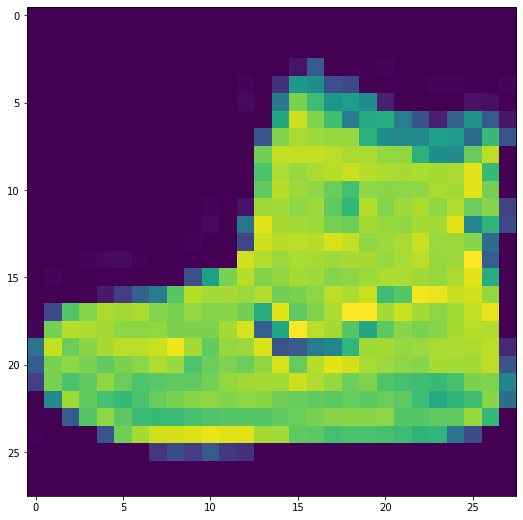

In [7]:
# Data Exploration
plt.figure(figsize=(16,9))
plt.imshow(train_images[0])
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

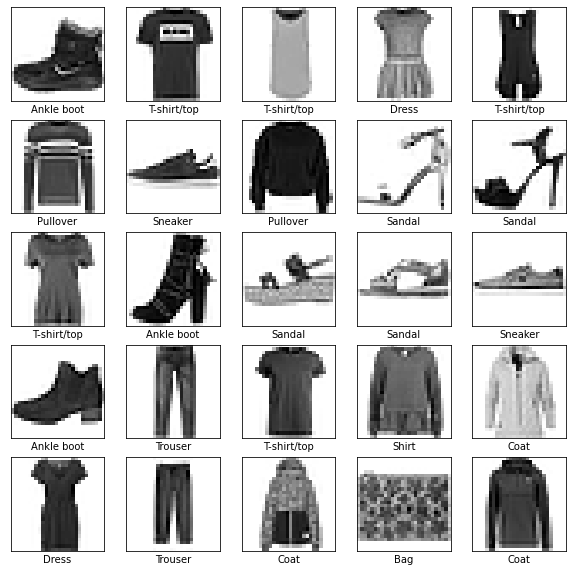

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
np.set_printoptions(linewidth=150)
print(train_images[0])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4944 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3717 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3340 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3089 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2913 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2537 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2449 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3442 - accuracy: 0.8795

Test accuracy: 0.8794999718666077


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images) 

In [22]:
predictions[0]

array([3.8983853e-06, 5.5145968e-08, 7.0781816e-08, 1.8897528e-10, 1.2366307e-07, 6.0642319e-04, 4.2974457e-07, 3.8201250e-03, 2.6226790e-08,
       9.9556893e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9